# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     Camila Garcia Ornelas|   |
| **Fecha**     01/09/2025 |   |
| **Expediente*749725* |   |

## Regresión polinomial

Observa la siguiente gráfica.

In [5]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [7]:
from sklearn.linear_model import LinearRegression

In [9]:
X = x.reshape(-1, 1)

In [11]:
lr = LinearRegression().fit(X, y)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [13]:
y_hat = lr.predict(X)

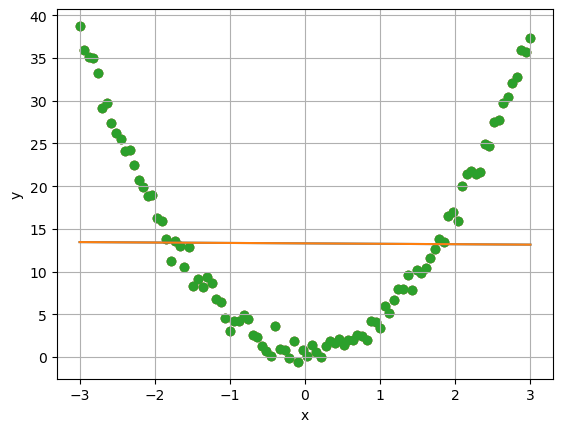

In [19]:
plt.scatter(x, y); plt.plot(x, y_hat); plt.grid()
plt.show()

In [17]:
from sklearn.metrics import r2_score; print(f"R^2 = {r2_score(y, y_hat):.3f}")

R^2 = 0.000


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [21]:
X2 = np.column_stack([x, x**2])

In [23]:
lr2 = LinearRegression().fit(X2, y)

In [25]:
from sklearn.metrics import r2_score; print(f"R^2 = {r2_score(y, lr2.predict(X2)):.3f}")

R^2 = 0.993


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

In [27]:
xg = np.linspace(x.min(), x.max(), 300).reshape(-1,1)

In [29]:
Xg2 = np.column_stack([xg.ravel(), xg.ravel()**2])

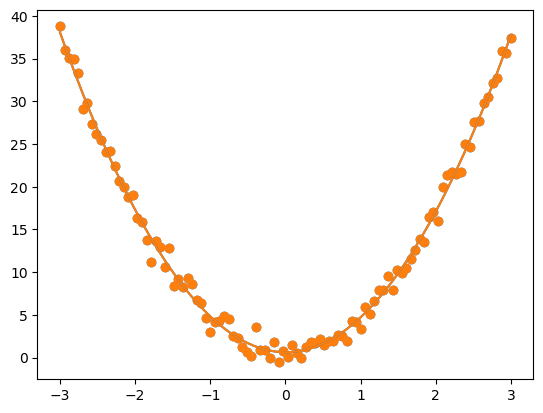

In [33]:
plt.scatter(x, y); plt.plot(xg, lr2.predict(Xg2)); plt.grid()
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [35]:
from sklearn.preprocessing import PolynomialFeatures; from sklearn.linear_model import LinearRegression; from sklearn.metrics import r2_score

In [37]:
X = x.reshape(-1,1); grados = [3,5,7,9,11]

In [39]:
r2 = {g: r2_score(y, LinearRegression().fit(PolynomialFeatures(g).fit_transform(X), y).predict(PolynomialFeatures(g).fit_transform(X))) for g in grados}; print(r2)

{3: 0.9934129585186598, 5: 0.9934954953676421, 7: 0.9935089341876935, 9: 0.9935141799662259, 11: 0.9935338704150221}


Crea una gráfica por cada modelo con las observaciones y su curva.

In [41]:
xg = np.linspace(x.min(), x.max(), 400).reshape(-1,1)

In [43]:
for g in grados: plt.figure(); plt.scatter(x,y); plt.plot(xg, LinearRegression().fit(PolynomialFeatures(g).fit_transform(X), y).predict(PolynomialFeatures(g).fit_transform(xg))); plt.title(f"grado {g} (R²={r2[g]:.3f})"); plt.grid()

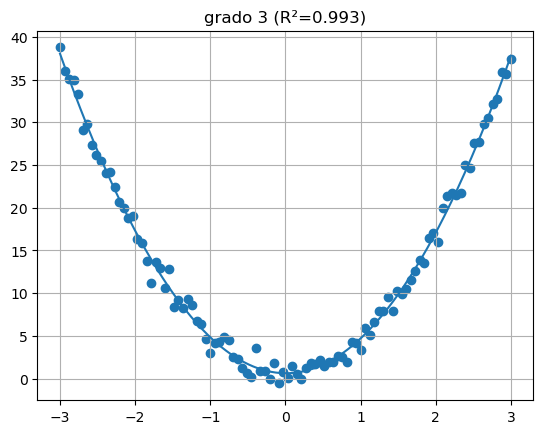

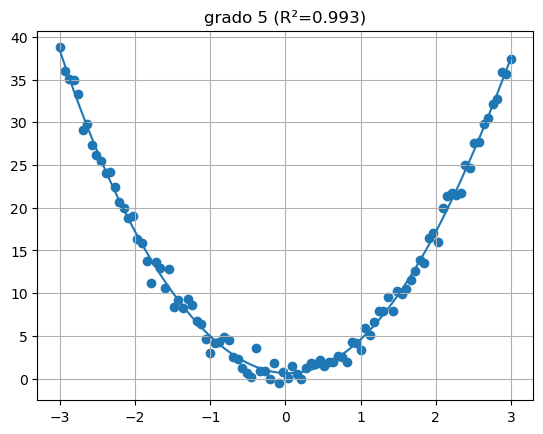

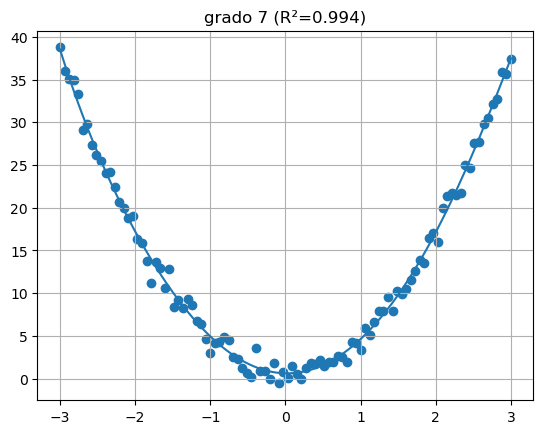

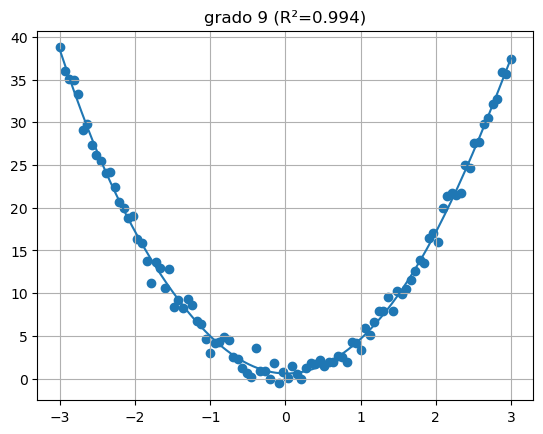

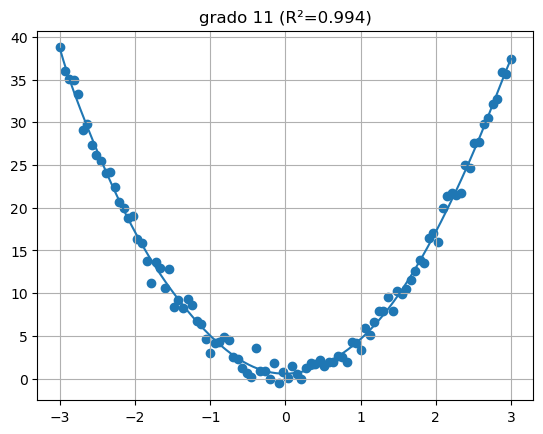

In [45]:
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [ ]:
El mejor es el modelo más simple que explique bien la curvatura. Como la forma real es parabólica, el grado 2 es el mejor.

In [ ]:
Los grados 3, 5, 7, 9 y 11 dan R^2 muy parecido (~0.993–0.994), pero no mejoran de forma relevante.

In [ ]:
El grado 3 es el más simple del grupo y rinde igual que los demás. Pero en general, el grado 2 es el adecuado para estos datos.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [56]:
grados = [2,3,5,7,9,11]; X = x.reshape(-1,1); x0 = np.array([[5.0]])

In [58]:
from sklearn.preprocessing import PolynomialFeatures; from sklearn.linear_model import LinearRegression

In [60]:
pred_5 = {g: LinearRegression().fit(PolynomialFeatures(g).fit_transform(X), y.ravel()).predict(PolynomialFeatures(g).fit_transform(x0)).ravel()[0] for g in grados}; print(pred_5)

{2: 103.96886954819949, 3: 104.25232438790759, 5: 84.59895012673232, 7: 33.74321847609332, 9: 215.73637926541642, 11: -5265.344253797715}


¿Cuál modelo crees que sea mejor?

In [ ]:
El mejor modelo es el del grado 2. Los puntos forman una U. Un modelo de grado 2 dibuja bien esa U sin complicarse.

In [ ]:
Si probamos x = 5, las predicciones fueron: {2: 104, 3: 104, 5: 85, 7: 34, 9: 216, 11: −5265}. 
Los grados 2 y 3 dan valores razonables; los grados 5, 7, 9 y 11 se van muy lejos.

In [ ]:
Todos los modelos más altos tienen un R^2 casi igual (~0.994), así que no mejoran el ajuste y sí son menos estables.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3